# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Emotions Analysis </p>

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">About Dataset</p>

## About the Dataset:
Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

## Key Features:
- text: A string feature representing the content of the Twitter message.
- label: A classification label indicating the primary emotion, with values ranging from 0 to 5.
## Potential Use Cases:
Sentiment Analysis: Uncover the prevailing sentiments in English Twitter messages across various emotions.
Emotion Classification: Develop models to accurately classify tweets into the six specified emotion categories.
Textual Analysis: Explore linguistic patterns and expressions associated with different emotional states.
## Sample Data:
| text                                           | label |
|------------------------------------------------|-------|
| that was what i felt when i was finally accept…| 1     |
| i take every day as it comes i'm just focussin…| 4     |
| i give you plenty of attention even when i fee…| 0     |


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Importing Libraries</p>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Loading Data</p>


In [2]:
# Load Data
df = pd.read_csv('/content/text.csv.zip')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [3]:
# Shape Of Data
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 3)


In [4]:
# Null Values
df.isnull().sum()

,0
Unnamed: 0,0
text,0
label,0


In [5]:
# Duplicates
df.duplicated().sum()

0

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Renaming The Columns Names</p>


In [6]:
# Rename Columns
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# Head Of Data
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [8]:
# Lets Rename Label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Label Count</p>


<ipython-input-9-dce92ff13c83>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


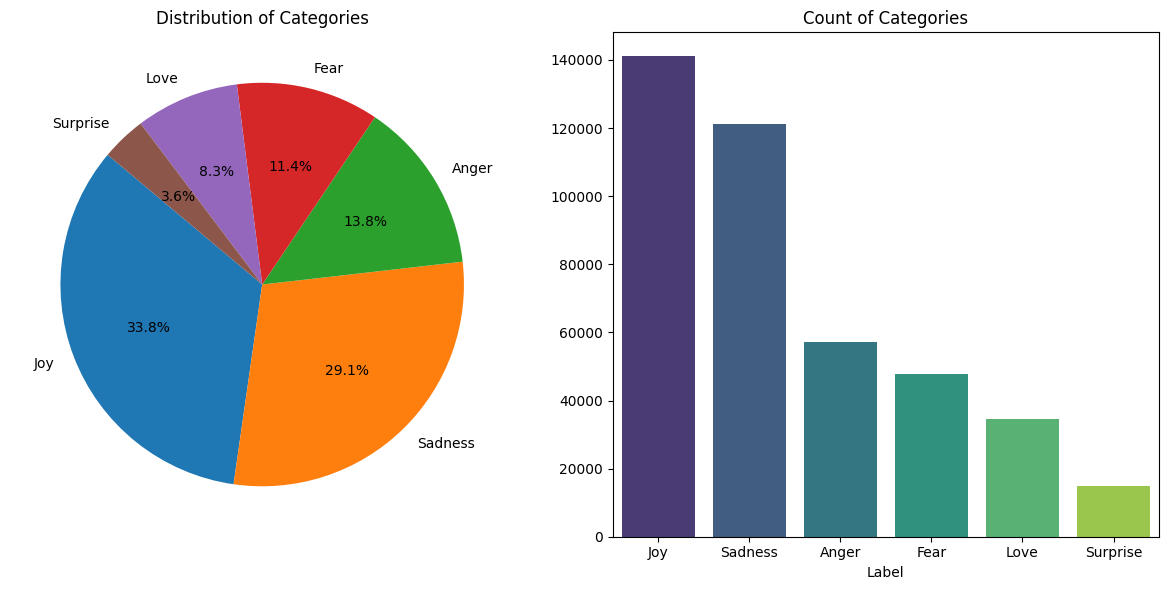

In [9]:
# Value Count Of Label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Two Seperate Data Set for Visualizng text</p>

In [10]:
# Make Seperate Data Set to Visualize text
# Sadness
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Visualizing Text Using Word Cloud</p>

***A word cloud is a visual representation of text data in which the frequency of each word's occurrence is depicted by the size of the word. Words that appear more frequently in the text are typically displayed with a larger font size, while less frequent words are smaller.***

***Word clouds are often used to quickly and visually summarize the most common words or themes within a large body of text. They are popular in data analysis, text mining, and visualization tasks, as they provide a simple yet effective way to identify patterns and trends in textual data.***

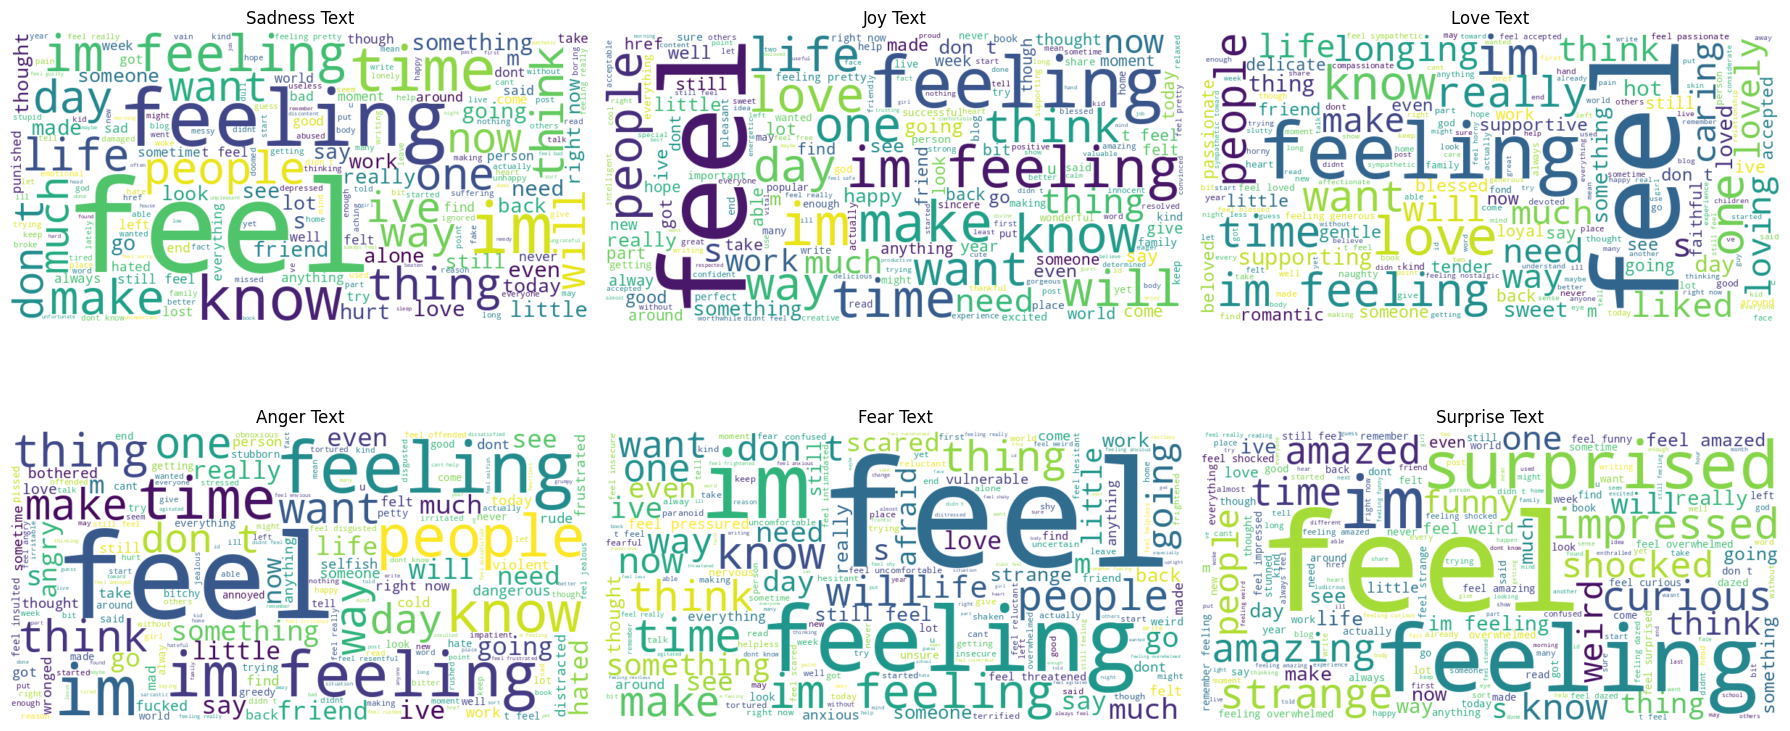

In [11]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Encode Label again</p>

In [12]:
# Now Unrename Label again
df['Label'] = df['Label'].replace('Sadness',0)
df['Label'] = df['Label'].replace('Joy',1)
df['Label'] = df['Label'].replace('Love',2)
df['Label'] = df['Label'].replace('Anger',3)
df['Label'] = df['Label'].replace('Fear',4)
df['Label'] = df['Label'].replace('Surprise',5)

<ipython-input-12-efec4dde12f5>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace('Surprise',5)


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Text Preprocessing</p>

1. **Step 1: Remove URLs:** Uses a regular expression to remove URLs from the text data.

2. **Step 2: Remove special characters and punctuation:** Uses a regular expression to remove any special characters and punctuation marks from the text.

3. **Step 3: Remove extra whitespaces:** Uses a regular expression to remove extra whitespaces and replace them with a single space.

4. **Step 4: Remove numeric values:** Uses a regular expression to remove any numeric values from the text.

5. **Step 6: Lowercasing:** Converts all text to lowercase to ensure consistency.

6. **Step 8: Remove stop words:** Removes common English stop words, such as "the," "is," "and," etc., using NLTK's stopwords list.

7. **Step 9: Remove non-alphanumeric characters:** Uses a regular expression to remove any non-alphanumeric characters from the text.

***Overall, these preprocessing steps help clean and normalize the text data, removing noise and ensuring that the data is consistent and suitable for further analysis or modeling tasks.***

In [13]:
# Import Basis Needed Libaries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (uncomment the following line if not already downloaded)?
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Url's</p>

In [14]:
# Step 1: Remove URLs
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Special Characters and Punctuation</p>

In [15]:
# Step 2: Remove special characters and punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove WhiteSpaces Extra's</p>

In [16]:
# Step 3: Remove extra whitespaces
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Numeric Values in Text</p>

In [17]:
# Step : 4 Remove numeric values
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)

# Head
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Lower Casing text</p>

In [18]:
# Step 6: Lowercasing
df['Text'] = df['Text'].str.lower()

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Stopwords</p>

In [19]:
# Step 8: Remove stop words
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Non-alpha Numeric</p>

In [20]:
# Step : 9 Remove non-alphanumeric characters from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Train Test Split</p>

In [21]:
X = df['Text']
y = df['Label']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (333447,)
X_test shape: (83362,)
y_train shape: (333447,)
y_test shape: (83362,)


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Tokenization and Padding Sequences</p>

#### 1. ***Tokenization:*** ***The text data in `X_train` and `X_test` is tokenized using the Tokenizer class from Keras. This step converts the text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index. The `num_words` parameter limits the vocabulary size to 50,000 most frequent words.***

#### 2. ***Padding:*** ***After tokenization, the sequences in `X_train` and `X_test` are padded to ensure uniform length. This is achieved using the pad_sequences function, which pads sequences with zeros to make them all of the same length (`maxlen`). Padding is done after the sequences to ensure that the actual content of the text is preserved.***

***Overall, the code prepares the text data for further processing and modeling by converting it into tokenized and padded sequences, making it suitable for use in machine learning algorithms such as neural networks.***

In [22]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [23]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


In [24]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post',)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   16 30399    69 ...     0     0     0]
 [  268     5   723 ...     0     0     0]
 [    1    44   721 ...     0     0     0]
 ...
 [    1   591     0 ...     0     0     0]
 [    4    15   473 ...     0     0     0]
 [    1   147  1739 ...     0     0     0]]

X_test_padded:
[[  120    39   169 ...     0     0     0]
 [ 3033 14468   785 ...     0     0     0]
 [  188   303    48 ...     0     0     0]
 ...
 [  841   271  1955 ...     0     0     0]
 [ 1907  7254   634 ...     0     0     0]
 [   82     1   400 ...     0     0     0]]


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Input Size</p>

In [25]:
# Embedding Input Size / Vocabulary Size
input_Size = np.max(X_train_padded) + 1
input_Size

50000

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Building</p>

<img src="Screenshot 2024-12-17 085811.png" alt="Capture d'écran" style="width:500px; height:auto;">

***I am Using BiDirectional GRU Here To Get Better Performence.Bidirectional Gated Recurrent Units (GRUs) are essential in natural language processing and sequence modeling tasks due to their ability to capture bidirectional dependencies in sequential data. Unlike traditional unidirectional models, which only process data in one direction (either forward or backward), bidirectional GRUs process input sequences in both directions simultaneously. This allows them to incorporate information from past and future context, enabling more comprehensive understanding and representation of the input sequence. By considering context from both directions, bidirectional GRUs excel in capturing long-range dependencies, especially in tasks where context plays a crucial role, such as sentiment analysis, machine translation, and named entity recognition. This bidirectional processing capability enhances model performance by capturing more nuanced relationships within the data, leading to improved accuracy and robustness in various sequence modeling tasks.***

- `model = Sequential()` initializes a sequential model, allowing layers to be added in sequence.

- The `Embedding` layer is added to the model. It is responsible for converting input integers (each representing a word index) into dense vectors of fixed size. This layer is essential for handling textual data.

- `Dropout` layer with a dropout rate of 0.5 is added next. Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.

- Two Bidirectional GRU layers are added sequentially. Bidirectional layers process the input sequence in both directions, allowing the model to capture information from past and future states. The `return_sequences=True` argument ensures that the output sequences are returned for each timestep.

- `BatchNormalization` layer is added to normalize the activations of the previous layer at each batch, aiding in faster and more stable training.

- Another Bidirectional GRU layer is added to capture bidirectional dependencies more effectively.

- The final `Dense` layer with 6 units (for 6 classes) and softmax activation function is added as the output layer for multi-class classification.

- The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

- `model.summary()` prints the summary of the model, displaying the architecture and parameter details.

In [26]:
# Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
model.add(BatchNormalization())

# Add Bidirectional GRU layer
model.add(Bidirectional(GRU(64)))

# Add output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Fitting</p>

In [27]:
# Model Train
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 58s 206ms/step - accuracy: 0.6258 - loss: 0.9683 - val_accuracy: 0.8838 - val_loss: 0.6647
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 46s 207ms/step - accuracy: 0.9324 - loss: 0.1307 - val_accuracy: 0.9298 - val_loss: 0.1371
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 82s 208ms/step - accuracy: 0.9403 - loss: 0.1015 - val_accuracy: 0.9318 - val_loss: 0.0965
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.9426 - loss: 0.0922 - val_accuracy: 0.9312 - val_loss: 0.0962
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 47s 212ms/step - accuracy: 0.9441 - loss: 0.0887 - val_accuracy: 0.9318 - val_loss: 0.0974


In [29]:
from keras.models import save_model
save_model(model,'sentiment model gru.h5')

In [30]:
import joblib
joblib.dump(tokenizer, "text_tokenizer.joblib")

['text_tokenizer.joblib']

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Visualizing Results</p>

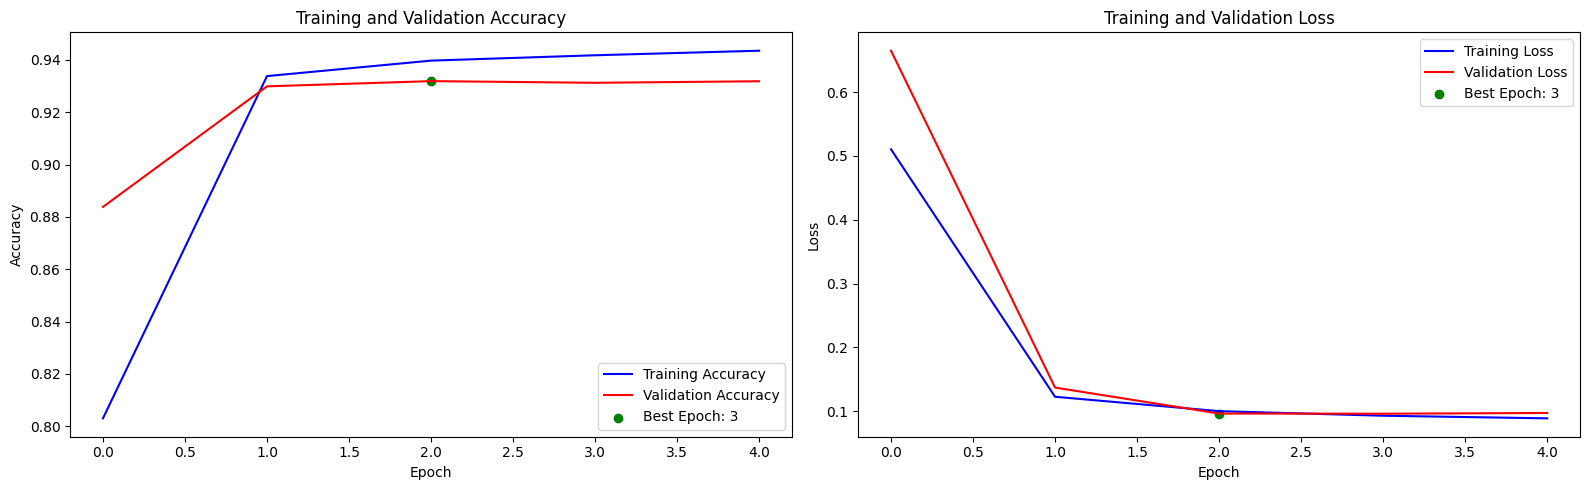

In [31]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Test Accuracy</p>

In [32]:
# Evaluate Test Data
model.evaluate(X_test_padded, y_test)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.9318 - loss: 0.0979


In [33]:
# Predictions On Test For Confustion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step


<Axes: >

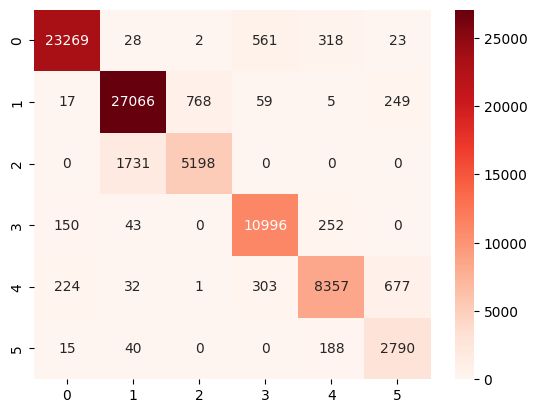

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">The End</p>

In [1]:
from keras.models import load_model

# Charger le modèle sauvegardé
model = load_model('sentiment model gru.h5')

# Afficher le résumé du modèle
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 79, 50)              │       2,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 79, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 79, 240)             │         123,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 79, 128)             │         117,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 79, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │          74,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817,128 (10.75 MB)

 Trainable params: 2,816,870 (10.75 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
import matplotlib.pyplot as plt


test_loss, test_acc = model.evaluate(X_test_padded, y_test)


# Récupérer les valeurs d'accuracy
train_accuracy = history.history['accuracy'][-1]  # Dernière accuracy d'entraînement
val_accuracy = history.history['val_accuracy'][-1]  # Dernière accuracy de validation
test_accuracy = test_acc  # Accuracy sur les données de test (obtenue via evaluate())

# Créer un histogramme
labels = ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
values = [train_accuracy, val_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'red', 'green'])
plt.title('Comparison of Training, Validation, and Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Ajuste l'échelle pour une meilleure lisibilité (si nécessaire)

# Afficher les valeurs sur les barres
for i, v in enumerate(values):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

plt.show()
